# Hochschule Bonn-Rhein-Sieg

# Learning and Adaptivity, SS18

# Assignment 03 (24-April-2018)

##  Sathiya Ramesh, Pradheep Krishna Muthukrishnan Padmanabhan, Naresh Kumar Gurulingan

## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from __future__ import print_function

In [2]:
mu = 0
sigma = 0.2
samples = 2000
np.random.seed(0)
data = np.random.normal(mu, sigma, samples)
esstimated_mu, estimated_sigma = stats.norm.fit(data)
print ('Difference between actual and estimated mean is {}'.format(abs(mu - esstimated_mu)))
print ('Difference between actual and estimated variance is {}'.format(abs(mu - esstimated_mu)))

Difference between actual and estimated mean is 0.0031639767174031813
Difference between actual and estimated variance is 0.0031639767174031813


## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

**Reference:** [daleroberts Githubgist](https://gist.github.com/daleroberts/7a13afed55f3e2388865b0ec94cd80d2)

In [3]:
def kernel_density_estimation(N1, N2, ax, using= 'scipy'):
    
    x = N1+N2
    y = N1-N2

    data = np.vstack((x, y))
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    
    if using == 'scipy':
        scipy_kernel = gaussian_kde(data)
        Z = np.reshape(scipy_kernel(positions).T, X.shape)
        
    elif using == 'scikit-learn':
        d, n = data.shape
        bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
        #bw = n**(-1./(d+4)) # scott
        
        kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
        kde.fit(data.T)
        Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap=plt.cm.coolwarm,
                  extent=[x_min, x_max, y_min, y_max])
    ax.scatter(x, y, c='k', s=4, edgecolor='')
    ax.set_title(using)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

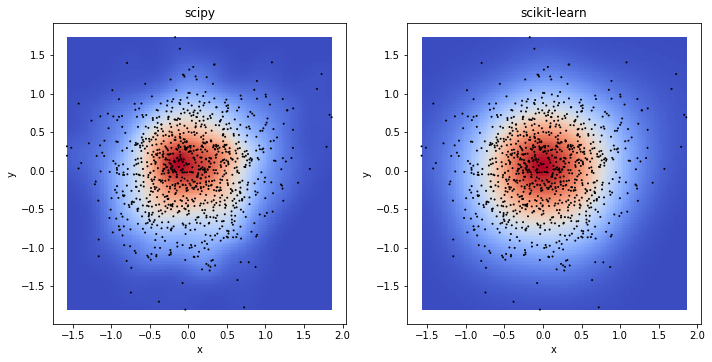

In [4]:
np.random.seed(1)
N1 = np.random.normal(0, scale= np.random.random(), size= 1000)
N2 = np.random.normal(0, scale= np.random.random(), size= 1000)

fig, subplots = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
kernel_density_estimation(N1, N2, ax= subplots[0], using= 'scipy')
kernel_density_estimation(N1, N2, ax= subplots[1], using= 'scikit-learn')
plt.tight_layout()
plt.show()